In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree, ensemble, metrics, linear_model
from sklearn.model_selection import train_test_split

colors = ["navy", "turquoise", "darkorange", "cornflowerblue"]

df = pd.read_csv('bioresponse.csv')

X = df.drop('Activity', axis=1)
Y = df['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

Доля правильных ответов: 0.7708703374777975
Точность: 0.7654135338345864
Полнота: 0.22376252909292635
Значение F1: 0.797805642633229
Логарифмическая потеря: 7.91396895833576


[Text(0.5, 0.875, 'X[26] <= 0.5\ngini = 0.496\nsamples = 2625\nvalue = [1202, 1423]'),
 Text(0.25, 0.625, 'X[77] <= 0.037\ngini = 0.419\nsamples = 1256\nvalue = [880, 376]'),
 Text(0.125, 0.375, 'X[224] <= 0.25\ngini = 0.353\nsamples = 996\nvalue = [768, 228]'),
 Text(0.0625, 0.125, 'gini = 0.338\nsamples = 971\nvalue = [762, 209]'),
 Text(0.1875, 0.125, 'gini = 0.365\nsamples = 25\nvalue = [6, 19]'),
 Text(0.375, 0.375, 'X[910] <= 0.382\ngini = 0.49\nsamples = 260\nvalue = [112, 148]'),
 Text(0.3125, 0.125, 'gini = 0.421\nsamples = 179\nvalue = [54, 125]'),
 Text(0.4375, 0.125, 'gini = 0.407\nsamples = 81\nvalue = [58, 23]'),
 Text(0.75, 0.625, 'X[128] <= 0.026\ngini = 0.36\nsamples = 1369\nvalue = [322, 1047]'),
 Text(0.625, 0.375, 'X[98] <= 0.444\ngini = 0.319\nsamples = 1208\nvalue = [241, 967]'),
 Text(0.5625, 0.125, 'gini = 0.444\nsamples = 225\nvalue = [75, 150]'),
 Text(0.6875, 0.125, 'gini = 0.281\nsamples = 983\nvalue = [166, 817]'),
 Text(0.875, 0.375, 'X[997] <= 0.5\ngini =

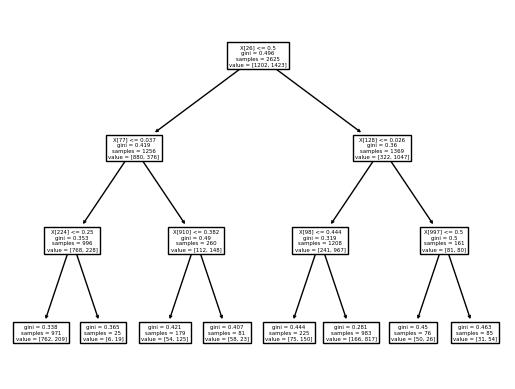

In [25]:
# мелкое дерево решений
clf_sm = tree.DecisionTreeClassifier(max_depth=3, random_state=17)
clf_sm.fit(X_train, y_train)
y_sm_pred = clf_sm.predict(X_test)

# рассчитываем метрики
print("Доля правильных ответов:", metrics.accuracy_score(y_test, y_sm_pred))
print("Точность:", metrics.precision_score(y_test, y_sm_pred))
print("Полнота:", metrics.completeness_score(y_test, y_sm_pred))
print("Значение F1:", metrics.f1_score(y_test, y_sm_pred))
print("Логарифмическая потеря:", metrics.log_loss(y_test, y_sm_pred))

# визуализация
tree.plot_tree(clf_sm)

Доля правильных ответов: 0.7673179396092362
Точность: 0.7792
Полнота: 0.21468445005281378
Значение F1: 0.7880258899676376
Логарифмическая потеря: 8.036651651786828


[Text(0.5703346946022727, 0.9545454545454546, 'X[26] <= 0.5\ngini = 0.496\nsamples = 2625\nvalue = [1202, 1423]'),
 Text(0.3114346590909091, 0.8636363636363636, 'X[77] <= 0.037\ngini = 0.419\nsamples = 1256\nvalue = [880, 376]'),
 Text(0.2159090909090909, 0.7727272727272727, 'X[224] <= 0.25\ngini = 0.353\nsamples = 996\nvalue = [768, 228]'),
 Text(0.1534090909090909, 0.6818181818181818, 'X[200] <= 0.765\ngini = 0.338\nsamples = 971\nvalue = [762, 209]'),
 Text(0.08096590909090909, 0.5909090909090909, 'X[1035] <= 0.5\ngini = 0.39\nsamples = 633\nvalue = [465, 168]'),
 Text(0.048295454545454544, 0.5, 'X[242] <= 0.188\ngini = 0.321\nsamples = 394\nvalue = [315, 79]'),
 Text(0.04261363636363636, 0.4090909090909091, 'X[899] <= 0.188\ngini = 0.305\nsamples = 388\nvalue = [315, 73]'),
 Text(0.028409090909090908, 0.3181818181818182, 'X[219] <= 0.747\ngini = 0.291\nsamples = 379\nvalue = [312, 67]'),
 Text(0.017045454545454544, 0.22727272727272727, 'X[80] <= 0.167\ngini = 0.275\nsamples = 370\n

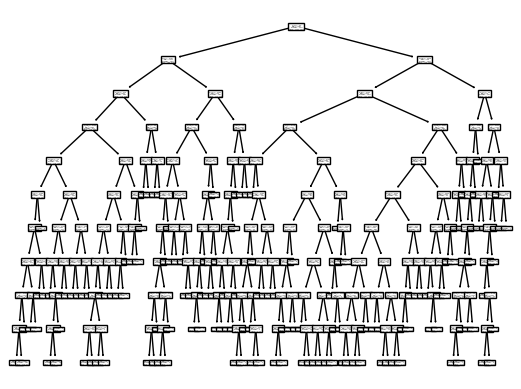

In [26]:
# глубокое дерево решений
clf_deep = tree.DecisionTreeClassifier(max_depth=10, random_state=17)
clf_deep.fit(X_train, y_train)
y_deep_pred = clf_deep.predict(X_test)

# рассчитываем метрики
print("Доля правильных ответов:", metrics.accuracy_score(y_test, y_deep_pred))
print("Точность:", metrics.precision_score(y_test, y_deep_pred))
print("Полнота:", metrics.completeness_score(y_test, y_deep_pred))
print("Значение F1:", metrics.f1_score(y_test, y_deep_pred))
print("Логарифмическая потеря:", metrics.log_loss(y_test, y_deep_pred))

# визуализация
tree.plot_tree(clf_deep)

In [27]:
# случайный лес на мелких деревья
rfc_sm = ensemble.RandomForestClassifier(n_estimators=3, random_state=0)
rfc_sm.fit(X_train, y_train)
y_frc_sm_pred = rfc_sm.predict(X_test)

# рассчитываем метрики
print("Доля правильных ответов:",
      metrics.accuracy_score(y_test, y_frc_sm_pred))
print("Точность:", metrics.precision_score(y_test, y_frc_sm_pred))
print("Полнота:", metrics.completeness_score(y_test, y_frc_sm_pred))
print("Значение F1:", metrics.f1_score(y_test, y_frc_sm_pred))
print("Логарифмическая потеря:", metrics.log_loss(y_test, y_frc_sm_pred))


Доля правильных ответов: 0.7220248667850799
Точность: 0.7306501547987616
Полнота: 0.14470929992715886
Значение F1: 0.750994431185362
Логарифмическая потеря: 9.601044530692628


In [28]:
# случайный лес на глубоких деревья
rfc_dp = ensemble.RandomForestClassifier(n_estimators=20, random_state=0)
rfc_dp.fit(X_train, y_train)
y_frc_dp_pred = rfc_dp.predict(X_test)

# рассчитываем метрики
print("Доля правильных ответов:",
      metrics.accuracy_score(y_test, y_frc_dp_pred))
print("Точность:", metrics.precision_score(y_test, y_frc_dp_pred))
print("Полнота:", metrics.completeness_score(y_test, y_frc_dp_pred))
print("Значение F1:", metrics.f1_score(y_test, y_frc_dp_pred))
print("Логарифмическая потеря:", metrics.log_loss(y_test, y_frc_dp_pred))

Доля правильных ответов: 0.7921847246891652
Точность: 0.8222222222222222
Полнота: 0.26202858804583945
Значение F1: 0.8043478260869565
Логарифмическая потеря: 7.177759178101101


Text(0.5, 1.0, 'График Precision-Recall')

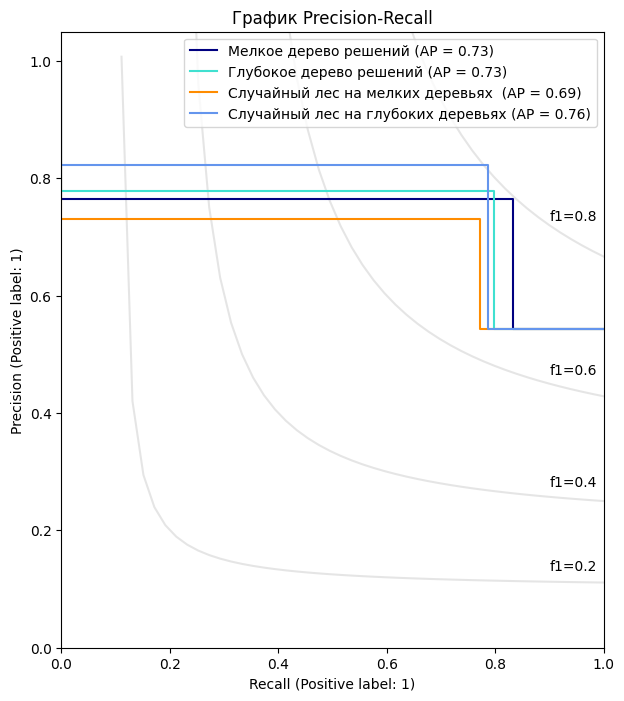

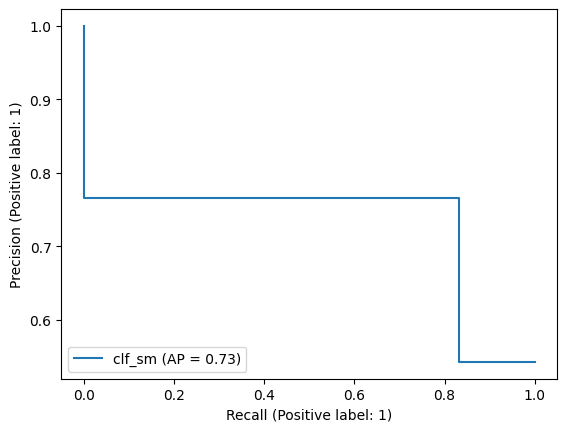

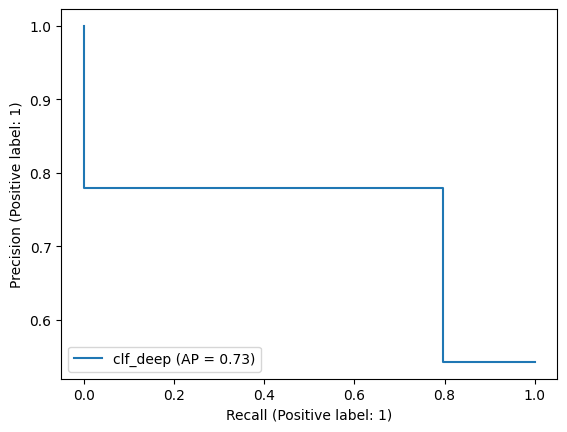

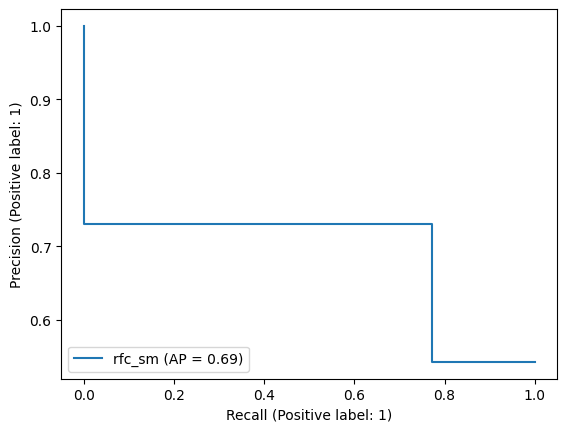

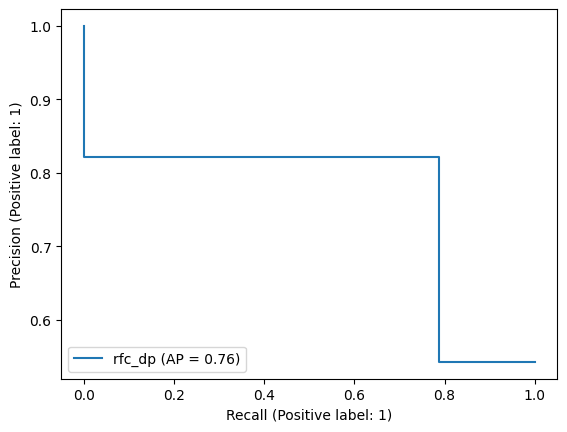

In [29]:
# построение кривых precision recall

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

values = [
    ('clf_sm', y_sm_pred, "Мелкое дерево решений"),
    ('clf_deep', y_deep_pred, "Глубокое дерево решений"),
    ('rfc_sm', y_frc_sm_pred, "Случайный лес на мелких деревьях "),
    ('rfc_dp', y_frc_dp_pred, "Случайный лес на глубоких деревьях")
]

for v in values:
    display = metrics.PrecisionRecallDisplay.from_predictions(y_test, v[1],
                                                              name=v[0])
    display.plot(ax=ax, name=v[2], color=colors[values.index(v)])

handles, labels = ax.get_legend_handles_labels()
handles.extend([l])

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("График Precision-Recall")


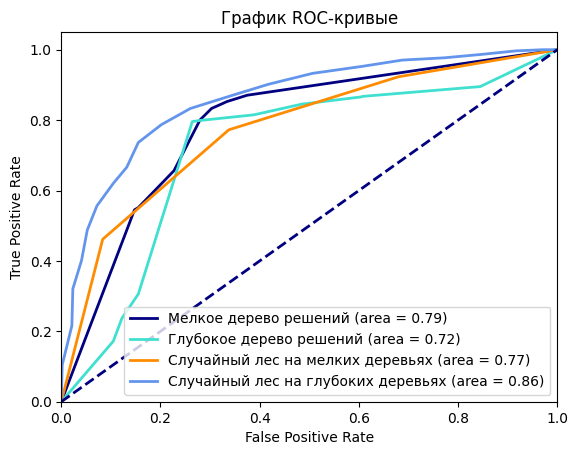

In [30]:
# построение roc кривых

fpr = dict()
tpr = dict()
roc_auc = dict()

values = [
    ('clf_sm', "Мелкое дерево решений (area = %0.2f)", clf_sm.predict_proba(X_test)[::,1]),
    ('clf_deep', "Глубокое дерево решений (area = %0.2f)", clf_deep.predict_proba(X_test)[::,1]),
    ('rfc_sm', "Случайный лес на мелких деревьях (area = %0.2f)", rfc_sm.predict_proba(X_test)[::,1]),
    ('rfc_dp', "Случайный лес на глубоких деревьях (area = %0.2f)", rfc_dp.predict_proba(X_test)[::,1])
]

for v in values:
    fpr[v[0]], tpr[v[0]], _ = metrics.roc_curve(y_test, v[2])
    roc_auc[v[0]] = metrics.roc_auc_score(y_test, v[2])

plt.figure()
lw = 2

for v in values:
    plt.plot(
        fpr[v[0]],
        tpr[v[0]],
        color=colors[values.index(v)],
        lw=lw,
        label=v[1] % roc_auc[v[0]],
    )

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("График ROC-кривые")
plt.legend(loc="lower right")
plt.show()

In [37]:
# классификатор избегающий ошибок второго рода
lr = linear_model.LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)

# рассчитываем метрики
print("Доля правильных ответов:",
      metrics.accuracy_score(y_test, y_lr_pred))
print("Точность:", metrics.precision_score(y_test, y_lr_pred))
print("Полнота:", metrics.completeness_score(y_test, y_lr_pred))
print("Значение F1:", metrics.f1_score(y_test, y_lr_pred))
print("Логарифмическая потеря:", metrics.log_loss(y_test, y_lr_pred))

Доля правильных ответов: 0.7451154529307282
Точность: 0.7555205047318612
Полнота: 0.17840250849334008
Значение F1: 0.7694779116465863
Логарифмическая потеря: 8.803510446661676


/home/sergey/PycharmProjects/BGML_TAA1/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
